# Нормализация числовых признаков

Нормализация числового признака предполагает что на основе существующего признака мы создаем новый признак, который в идеале имеет нормальное распределение. 

Многие модели машинного обучения лучше работают с нормализованными признаками, особенно линейные модели.

Какие функции чаще всего используются для нормализации:

- логарифм - np.log(X)
- обратная зависимость - 1 / X
- квадратный корень
- возведение в степень
- [преобразование Бокса-Кокса (Box-Cox transformation)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%91%D0%BE%D0%BA%D1%81%D0%B0-%D0%9A%D0%BE%D0%BA%D1%81%D0%B0)
- [преобразование Йео-Джонсона (Yeo-Johnson transformation) - расширение метода Бокса-Кокса для работы с произвольными величинами](https://www.stat.umn.edu/arc/yjpower.pdf)

**Как визуально определить, является ли распределение нормальным?**

1. Гистограмма распределения.

1. [График квантиль-квантиль](http://statistica.ru/glossary/general/grafiki-kvantil-kvantil/) или [Q-Q plot.](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

## Загрузка и первичный анализ данных

Используем данные из соревнования [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [3]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/houseprices.csv', sep=",")

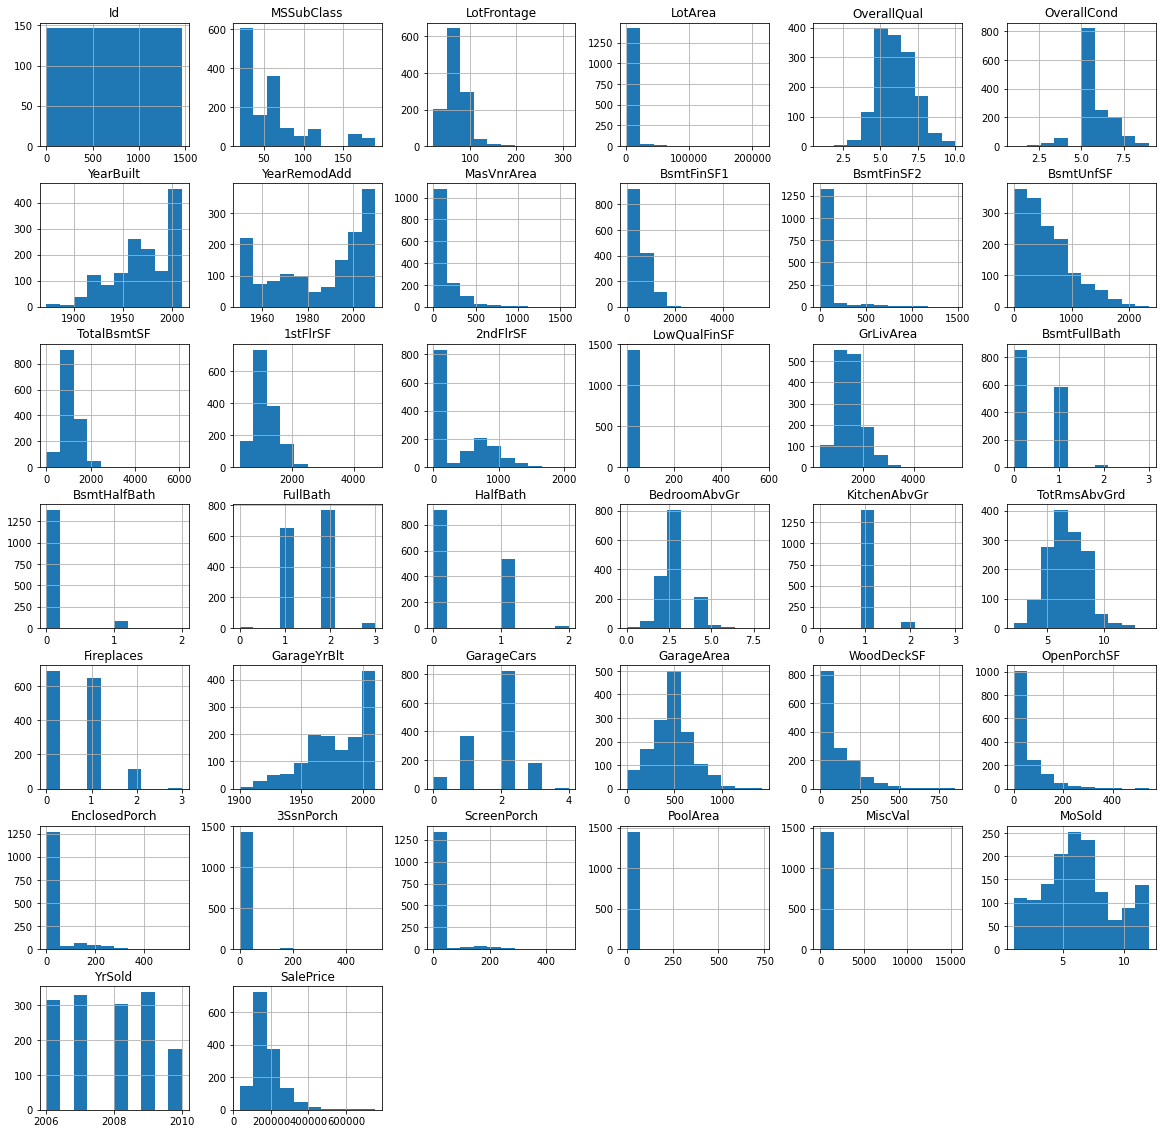

In [4]:
data.hist(figsize=(20,20))
plt.show()

## Исходное распределение

Можно видеть, что оно отличается от нормального.

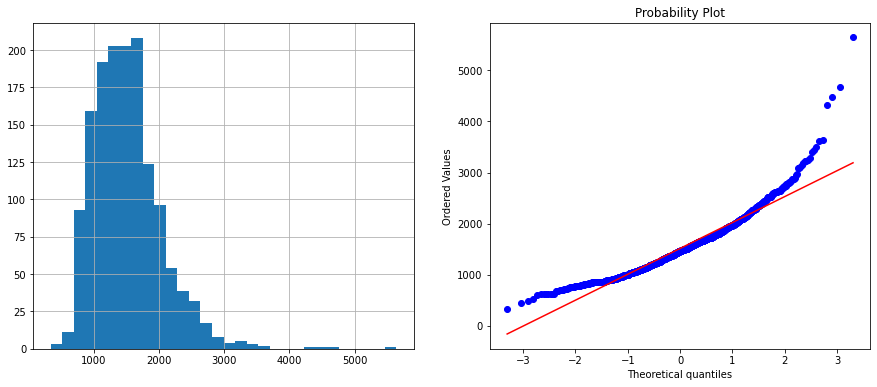

In [5]:
diagnostic_plots(data, 'GrLivArea')

## Логарифмическое преобразование

Более приближено к нормальному.

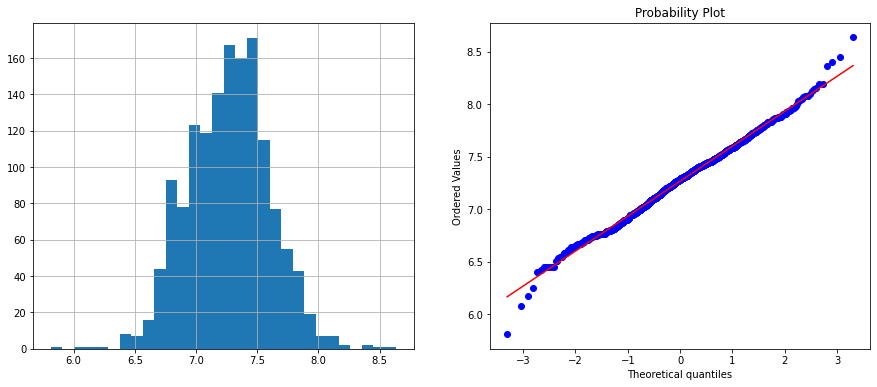

In [6]:
data['GrLivArea_log'] = np.log(data['GrLivArea'])
diagnostic_plots(data, 'GrLivArea_log')

## Обратное преобразование

Не очень хороший результат.

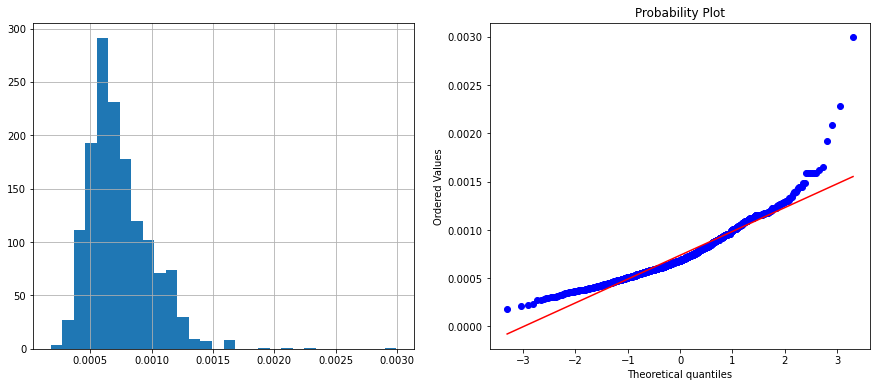

In [7]:
data['GrLivArea_reciprocal'] = 1 / (data['GrLivArea']) 
diagnostic_plots(data, 'GrLivArea_reciprocal')

## Квадратный корень

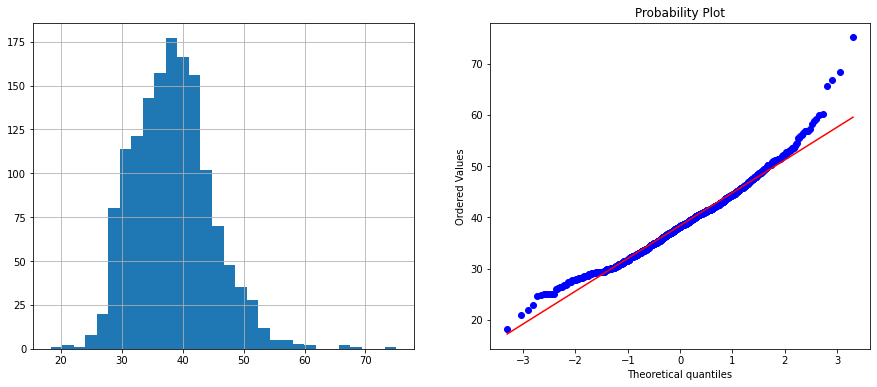

In [8]:
data['GrLivArea_sqr'] = data['GrLivArea']**(1/2) 
diagnostic_plots(data, 'GrLivArea_sqr')

## Возведение в степень

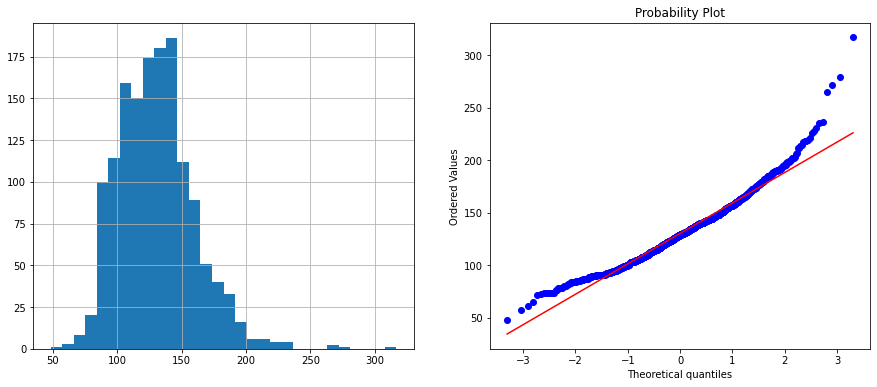

In [9]:
data['GrLivArea_exp1'] = data['GrLivArea']**(1/1.5)
diagnostic_plots(data, 'GrLivArea_exp1')

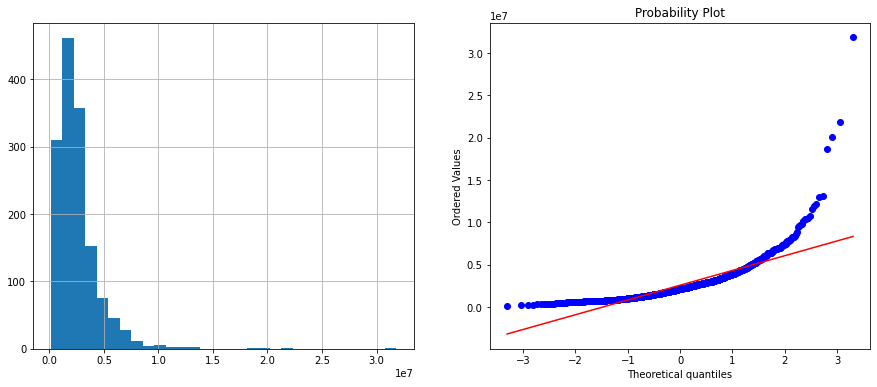

In [10]:
data['GrLivArea_exp2'] = data['GrLivArea']**(2)
diagnostic_plots(data, 'GrLivArea_exp2')

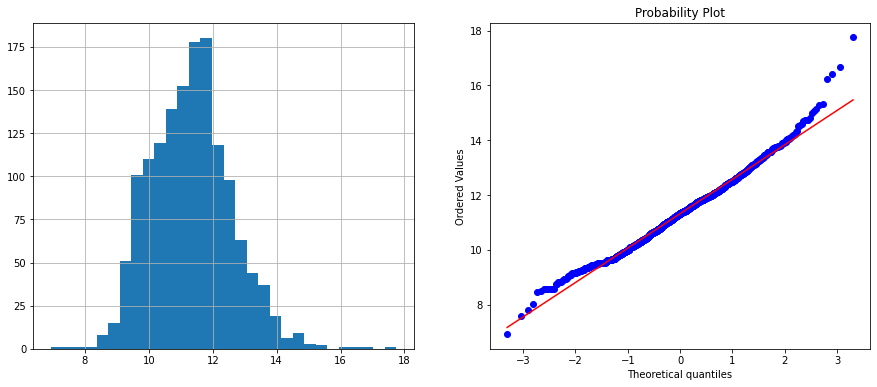

In [11]:
data['GrLivArea_exp3'] = data['GrLivArea']**(0.333)
diagnostic_plots(data, 'GrLivArea_exp3')

## Преобразование Бокса-Кокса

Очень хороший результат.

Оптимальное значение λ = 0.006304924353543215


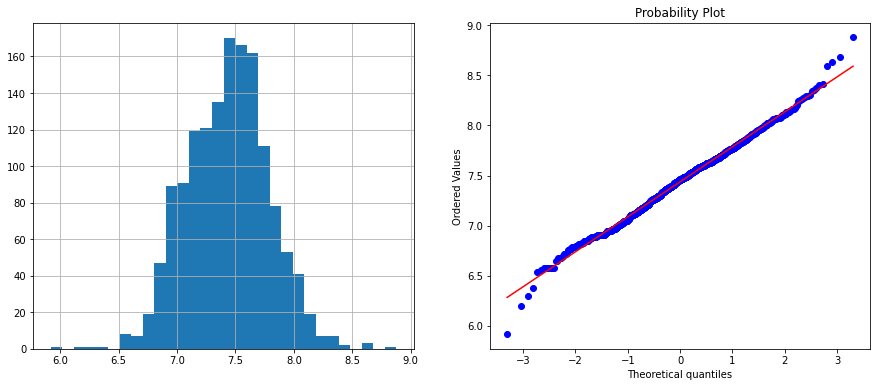

In [12]:
data['GrLivArea_boxcox'], param = stats.boxcox(data['GrLivArea']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'GrLivArea_boxcox')

## Преобразование Йео-Джонсона

Очень хороший результат.

Оптимальное значение λ = 0.005539641278705955


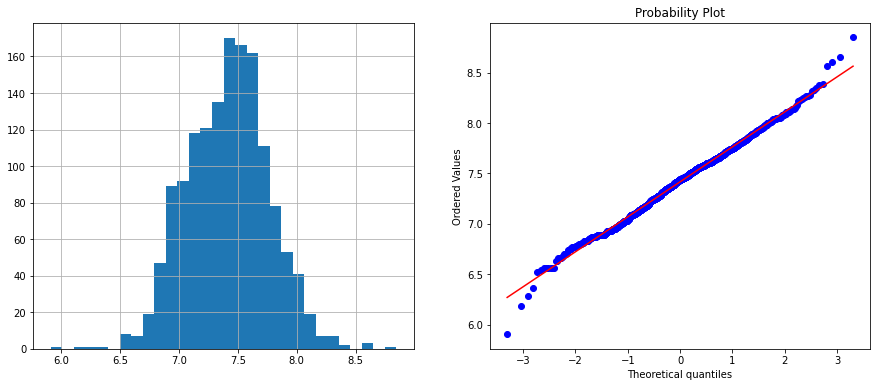

In [13]:
# Необходимо преобразовать данные к действительному типу
data['GrLivArea'] = data['GrLivArea'].astype('float')
data['GrLivArea_yeojohnson'], param = stats.yeojohnson(data['GrLivArea']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'GrLivArea_yeojohnson')